In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

## Making Predictions

In [2]:
w = torch.tensor(3.0,requires_grad=True)
b = torch.tensor(1.0,requires_grad=True)


In [3]:
def forward(x):
    y = w*x + b
    return y

In [4]:
x = torch.tensor(2)
forward(x)

tensor(7., grad_fn=<AddBackward0>)

In [5]:
x = torch.tensor([[4],[7]])
forward(x)

tensor([[13],
        [22]], grad_fn=<AddBackward0>)

## Linear Class

In [6]:
from torch.nn import Linear

In [7]:
torch.manual_seed(1) # set seed for random numbers
model = Linear(in_features=1,out_features=1)
print(model.bias,model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [8]:
x = torch.tensor([2.0])
print(model(x))

tensor([0.5891], grad_fn=<AddBackward0>)


In [9]:
x = torch.tensor([[2.0],[3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


## Custom Modules

In [10]:
import torch.nn as nn

In [11]:
class LR(nn.Module):
    
    def __init__(self,input_size,output_size):
        super().__init__()
        self.linear = nn.Linear(input_size,output_size)
    
    def forward(self,x):
        pred = self.linear(x)
        return pred

In [12]:
torch.manual_seed(1)
model = LR(input_size=1,output_size=1)

In [13]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [14]:
x = torch.tensor([1.0])
model.forward(x)

tensor([0.0739], grad_fn=<AddBackward0>)

In [15]:
x = torch.tensor([[1.0],[2.0]])
model.forward(x)

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)

## Creating Dataset

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5,0,'x')

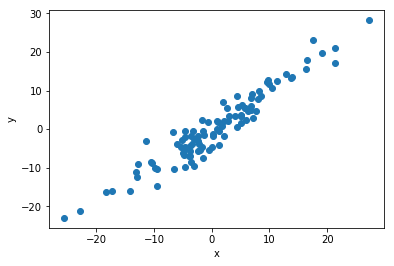

In [2]:
X = torch.randn(100,1)*10
y = X + torch.randn(100,1)*3
plt.plot(X.numpy(),y.numpy(),'o')
plt.ylabel('y')
plt.xlabel('x')

In [5]:
class LR(nn.Module):
    
    def __init__(self,input_size,output_size):
        super().__init__()
        self.linear = nn.Linear(input_size,output_size)
    
    def forward(self,x):
        pred = self.linear(x)
        return pred

In [6]:
torch.manual_seed(1)
model = LR(1,1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [7]:
[w,b] = model.parameters()
print(w,b)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [8]:
def get_params():
    return (w[0][0].item(),b[0].item())

In [9]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

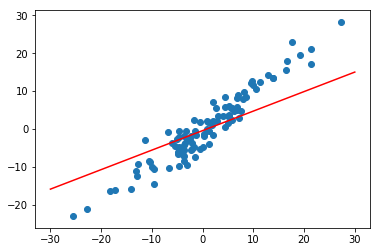

In [10]:
plot_fit('Initial Models')

## Loss Function

## Gradient Descent

In [11]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [12]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())
  
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 25.808931350708008
epoch: 1 loss: 16.365205764770508
epoch: 2 loss: 11.81375789642334
epoch: 3 loss: 9.6198091506958
epoch: 4 loss: 8.56190013885498
epoch: 5 loss: 8.051446914672852
epoch: 6 loss: 7.804823875427246
epoch: 7 loss: 7.685360431671143
epoch: 8 loss: 7.627195358276367
epoch: 9 loss: 7.598592281341553
epoch: 10 loss: 7.584257125854492
epoch: 11 loss: 7.57681941986084
epoch: 12 loss: 7.572725772857666
epoch: 13 loss: 7.570263385772705
epoch: 14 loss: 7.568606853485107
epoch: 15 loss: 7.567358016967773
epoch: 16 loss: 7.56632137298584
epoch: 17 loss: 7.565405368804932
epoch: 18 loss: 7.564563751220703
epoch: 19 loss: 7.563773155212402
epoch: 20 loss: 7.563022613525391
epoch: 21 loss: 7.562306880950928
epoch: 22 loss: 7.561620235443115
epoch: 23 loss: 7.560961723327637
epoch: 24 loss: 7.560329914093018
epoch: 25 loss: 7.559723377227783
epoch: 26 loss: 7.559141159057617
epoch: 27 loss: 7.558581352233887
epoch: 28 loss: 7.558043479919434
epoch: 29 loss: 7.557527542

Text(0.5,0,'epoch')

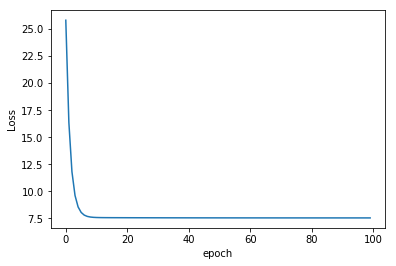

In [13]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

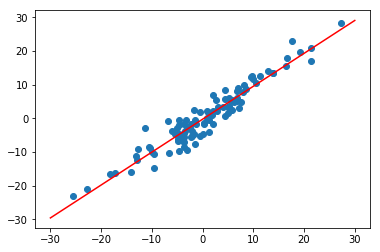

In [14]:
plot_fit("Trained Model")